# ML Modeling, EDA

Prelude
---
Ask `chatGPT` to give me a outline of EDA on this dataset, vehicle's CO2-emission, and answers:

1. Explore the data types of each column: Check if each column has the right data type (e.g., numeric data should be represented as floats or integers, while categorical data should be represented as strings).

2. Explore the distribution of numeric variables: Use histograms or boxplots to visualize the distribution of numeric variables such as ENGINESIZE, CYLINDERS, FUELCONSUMPTION_CITY, FUELCONSUMPTION_HWY, FUELCONSUMPTION_COMB, and CO2EMISSIONS. This will help you understand the range, central tendency, and spread of the data.

3. Explore the relationships between variables: Check if there are any correlations between the variables. You can use scatter plots or correlation matrices to visualize the relationships between variables such as ENGINESIZE, CYLINDERS, FUELCONSUMPTION_CITY, FUELCONSUMPTION_HWY, FUELCONSUMPTION_COMB, and CO2EMISSIONS. This will help you understand which variables are most strongly associated with each other.

4. Explore categorical variables: Check if there are any categorical variables in the dataset, such as MAKE, MODEL, VEHICLECLASS, TRANSMISSION, and FUELTYPE. You can use bar charts or frequency tables to visualize the distribution of these variables.

5. Check for outliers: Check if there are any outliers in the dataset, which could potentially skew the results of the model. You can use boxplots or scatter plots to identify any extreme values.

6. Feature engineering: Consider creating new features based on existing variables in the dataset, such as calculating the average fuel consumption (FUELCONSUMPTION_AVG) or engine displacement (ENGINE_DISPLACEMENT) based on ENGINESIZE and CYLINDERS.


Thus let us exploration to the ML modeling journey, follows this schedule.



Reference
---
1. [src](https://medium.com/joguei-os-dados/week-3-predicting-co2-emissions-70e554ad2276)
2. [Dataset, Kaggle](https://www.kaggle.com/gangliu/oc2emission/tasks), dataset contains information of CO2 emission from cars.
3. Statistics, Soul of ML,
   - Gopal K. Kanji, 100 STATISTICAL TESTS 3rd Edition, Sage Publications, 2006
   - [Jason Brownlee , 17 Statistical Hypothesis Tests in Python (Cheat Sheet)](https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/?utm_source=drip&utm_medium=email&utm_campaign=17+Statistical+Hypothesis+Tests+in+Python+%28Cheat+Sheet%29&utm_content=17+Statistical+Hypothesis+Tests+in+Python+%28Cheat+Sheet%29), comes with examples by Python

In [1]:
# import packages required

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

%matplotlib inline

In [3]:
## atributing dataset to a dataframe df
file="https://raw.githubusercontent.com/cchuang2009/2022-1/main/Python_IM/2023-2/data/FuelConsumptionCo2.csv"
#df = pd.read_csv('data/FuelConsumptionCo2.csv')
df=pd.read_csv(file)
df.head(2)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221


In [4]:
# save data
df.to_csv("CO2_raw.csv",index=0)

In [3]:
# length of data, type of features 
# No nan data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [5]:
# sizes of kinds of uniques in each feature
# "MODELYEAR" coulde be neglicted since only one value there
df.nunique()

MODELYEAR                     1
MAKE                         39
MODEL                       663
VEHICLECLASS                 16
ENGINESIZE                   45
CYLINDERS                     7
TRANSMISSION                 22
FUELTYPE                      4
FUELCONSUMPTION_CITY        167
FUELCONSUMPTION_HWY         118
FUELCONSUMPTION_COMB        148
FUELCONSUMPTION_COMB_MPG     43
CO2EMISSIONS                159
dtype: int64

In [5]:
# select numerical columns
num_cols = list(df.select_dtypes(include=['int64','float64']).columns)
# select categorical columns
cat_cols = list(df.select_dtypes(include=['object','category']).columns)
# remove the column MODELYEAR from the numerical columns since it is only one value
num_cols.remove('MODELYEAR')

In [4]:
# find out the count/value of most freqenency one in certain feature
# count of values mostly in "TRANSMISSION" is 222 and is 'A6'

df['TRANSMISSION'].value_counts().max(), df['TRANSMISSION'].value_counts().idxmax()

(222, 'A6')

EDA (Exploratory Data Analysis)
---
by Visualization is the best way to observe the data,
- How many different kinds are there in each feature?
- What does the data distributed?

In [ ]:
# countplot 
plt.figure(figsize=(20,4))
sns.countplot(x='MODEL', data=df[:40])
plt.xticks(rotation=15);

In [12]:
num_cols

['ENGINESIZE',
 'CYLINDERS',
 'FUELCONSUMPTION_CITY',
 'FUELCONSUMPTION_HWY',
 'FUELCONSUMPTION_COMB',
 'FUELCONSUMPTION_COMB_MPG',
 'CO2EMISSIONS']

In [15]:
cat_cols

['MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE']

In [7]:
# snippt to find size of key in "string"-like feature
# there are 279 states in the first word in "Model" feature
cat_cols_val=df['MODEL'].values
new_cat_cols_val = [col.split(' ')[0] for col in cat_cols_val]

len(set(new_cat_cols_val))

279

In [8]:
# Snippt to map string-like feature to its frequency
MODEL_dict = df['MODEL'].value_counts().to_dict()
#
#set(MODEL_dict.values())
# {1, 2, 3, 4, 5, 6, 8}
df['MODEL_freq_enc'] = df['MODEL'].map(MODEL_dict)

Visualisation
---
1. histogram, numerical feature,
2. countplot, the frequency, categrorical features
3. Relation
   - corelation matrix, numerical feature
   - boxplot, categorical feature vs numerical target

In [ ]:
def plot_numeric_distribution(df,num_cols):
    for col in num_cols:
        plt.figure(figsizecor=(6, 4))
        sns.histplot(df[col], kde=False)
        plt.title(col)
        plt.show()

plot_numeric_distribution(df,num_cols)       

In [ ]:
# use bar charts or frequency tables to visualize the distribution of these categorical columns
def plot_categorical_distribution(df,cols,rot=45):
    for col in cols:    
        plt.figure(figsize=(12,4))
        sns.countplot(x=col, data=df)
        plt.title(col)
        plt.xticks(rotation=rot)
        plt.show()
#plot_categorical_distribution(df,cat_cols)
plot_categorical_distribution(df,cat_cols)       

In [27]:
# use boxplots to visualize the relationship between categorical and numerical columns
def plot_categorical_numerical_relationship(df,cat_cols,num_cols):
    for cat_col in cat_cols:
        for num_col in num_cols:
            plt.figure(figsize=(8, 6))
            sns.boxplot(x=cat_col, y=num_col, data=df)
            plt.title(cat_col + ' vs ' + num_col)
            plt.xticks(rotation=45)
            plt.show()

In [ ]:
# Model too noisy to use
plot_categorical_numerical_relationship(df,cat_cols,['CO2EMISSIONS'])

In [ ]:
# correlation between numerical columns
def plot_correlation(df,num_cols):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
    plt.show()
plot_correlation(df,num_cols)   

Feature Encoding 
---
Build model, requires "numbers" only; but
1. For numerical data: whether and what  is data distributed statistically?
2. For categorical data, just encode them into numerical ones; we can use the package, `catgorical_coders`, to make it.
   - 'one-hot': suppose that feature = `['A','B',...]`, then create new features, `'A','B',...`, set to 1 if data is in 'A',  else 0.

```        
feature: 'A','B'
data/.   feature
1           A
2           1
            ⬇︎
data/.   feature    feature_A.  feature_B
1           A          1           0
2           B          0           1            
```
   - LeaveOneOut Encoder, encode by the same category of data but except itself, suitable for feature having outlier.
       
```
import category_encoders as ce
encoder = ce.LeaveOneOutEncoder(cols=[...])
encoder.fit(X, y)
Xt = encoder.transform(X_new)

data/.   X.  y          data/.  X  Xt   y    
1.       A   10          1      A  20  10   20/1
2        A.  20          2      A. 10. 20   10/1 
3.       B.  20   ➠      3.     B  25. 20   (30+20)/2
4.       B.  30          4.     B. 20. 30   (20+20)/2
5.       B   20          5.     B. 25. 20   (20+30)/2
```
   - Others, [Beta Target Encoding](https://www.kaggle.com/mmotoki/avito-target-encoding), [Generalized linear mixed model](https://github.com/scikit-learn-contrib/category_encoders)

In [9]:
features=['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 
       'FUELCONSUMPTION_COMB_MPG',
        'MAKE','VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE',
        'CO2EMISSIONS']

In [11]:
# model by pycaret
from pycaret.regression import *


In [ ]:
data=df[features]

s = setup(data = data, target = 'CO2EMISSIONS', session_id=123)

In [ ]:
best = compare_models()

In [14]:
best

ExtraTreesRegressor(n_jobs=-1, random_state=123)

In [ ]:
# Linear model, fast is its advantage
lr=create_model('lr')

In [ ]:
# auto-turning parameters
tuned_lr= tune_model(lr)

In [17]:
final_lr= finalize_model(tuned_lr)
print(final_lr)

Pipeline(memory=FastMemory(location=/var/folders/xb/s7vwrt4153xbxzr8hc8tbdtr0000gn/T/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['ENGINESIZE', 'CYLINDERS',
                                             'FUELCONSUMPTION_CITY',
                                             'FUELCONSUMPTION_HWY',
                                             'FUELCONSUMPTION_COMB',
                                             'FUELCONSUMPTION_COMB_MPG'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=...
                 TransformerWrapper(include=['VEHICLECLASS', 'TRANSMISSION',
                                             'FUELTYPE'],
                                    transformer=OneHotEncoder(cols=['VEHICLECLASS',
                                                                    'TRANSMISSION',
                                                          

In [18]:
save_model(final_lr,'Final_lr_2023_4_27')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/var/folders/xb/s7vwrt4153xbxzr8hc8tbdtr0000gn/T/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['ENGINESIZE', 'CYLINDERS',
                                              'FUELCONSUMPTION_CITY',
                                              'FUELCONSUMPTION_HWY',
                                              'FUELCONSUMPTION_COMB',
                                              'FUELCONSUMPTION_COMB_MPG'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=...
                  TransformerWrapper(include=['VEHICLECLASS', 'TRANSMISSION',
                                              'FUELTYPE'],
                                     transformer=OneHotEncoder(cols=['VEHICLECLASS',
                                                                     'TRANSMISSION',
                                            

In [21]:
saved_final_lr= load_model('Final_lr_2023_4_27')
#predict_model(saved_final_cat)
print(saved_final_lr)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=/var/folders/xb/s7vwrt4153xbxzr8hc8tbdtr0000gn/T/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['ENGINESIZE', 'CYLINDERS',
                                             'FUELCONSUMPTION_CITY',
                                             'FUELCONSUMPTION_HWY',
                                             'FUELCONSUMPTION_COMB',
                                             'FUELCONSUMPTION_COMB_MPG'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=...
                 TransformerWrapper(include=['VEHICLECLASS', 'TRANSMISSION',
                                             'FUELTYPE'],
                                    transformer=OneHotEncoder(cols=['VEHICLECLASS',
                                                                    'TRANSMISSION',
    

In [ ]:
# catboost
catboost = create_model('catboost')

In [ ]:
tuned_cat = tune_model(catboost)

In [21]:
predict_model(tuned_cat)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,1.4961,6.9455,2.6354,0.9981,0.0102,0.0059


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,MAKE,VEHICLECLASS,TRANSMISSION,FUELTYPE,CO2EMISSIONS,prediction_label
395,1.6,4,8.0,5.8,7.0,40,FORD,SUBCOMPACT,AS6,X,161,160.908566
373,3.5,6,15.4,11.0,13.4,21,FORD,PICKUP TRUCK - STANDARD,AS6,X,308,307.927231
558,3.0,6,14.7,9.6,12.4,23,JAGUAR,FULL-SIZE,AS8,Z,285,285.367997
670,4.6,8,15.1,10.3,12.9,22,LEXUS,MID-SIZE,AS8,Z,297,296.783460
278,3.6,6,17.0,11.2,14.4,20,CHRYSLER,COMPACT,A6,E,230,231.005012
...,...,...,...,...,...,...,...,...,...,...,...,...
656,2.5,4,5.8,6.2,6.0,47,LEXUS,MID-SIZE,AV6,X,138,138.375147
59,3.0,6,13.3,9.5,11.6,24,AUDI,SUBCOMPACT,A7,Z,267,265.561271
811,1.6,4,9.1,6.7,8.0,35,MINI,TWO-SEATER,M6,Z,184,183.902371
578,2.0,4,10.2,7.8,9.1,31,JEEP,SUV - SMALL,M5,X,209,209.580574


In [22]:
final_cat = finalize_model(tuned_cat)
print(final_cat)

Pipeline(memory=FastMemory(location=/var/folders/xb/s7vwrt4153xbxzr8hc8tbdtr0000gn/T/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['ENGINESIZE', 'CYLINDERS',
                                             'FUELCONSUMPTION_CITY',
                                             'FUELCONSUMPTION_HWY',
                                             'FUELCONSUMPTION_COMB',
                                             'FUELCONSUMPTION_COMB_MPG'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=...
                                             'FUELTYPE'],
                                    transformer=OneHotEncoder(cols=['VEHICLECLASS',
                                                                    'TRANSMISSION',
                                                                    'FUELTYPE'],
                                                      

In [24]:
save_model(final_cat,'Final_cat_2023_4_25')

Transformation Pipeline and Model Successfully Saved


(<catboost.core.CatBoostRegressor at 0x7f9115fabd60>,
 'Final_cat_2023_4_25.pkl')

IMPORTANT NOTE
---
Unlike done in "Linear Regression" case, load "cat_model" is not in "Pipeline" mode. 

What is the difference between "Model" and "Pipeline mode"?
```
BY chatGPT
---
In summary:

a model is a single algorithm that makes predictions on new data, 
while a pipeline is a series of data processing steps that can include one or more models, used to transform the input data into a desired output. "Pipeline mode" refers specifically to the use of multiple models in a pipeline.
```

This is an issue or feature of Pycaret: cound not use pycaret to "catboost" model. Use `pickle` to take over:

In [26]:
# loading library
import pickle
# create an iterator object with write permission - model.pkl
with open('model_pkl', 'wb') as files:
    pickle.dump(final_cat, files)
#with open('model_pkl' , 'rb') as f:
#    lr = pickle.load(f)

In [27]:
saved_final_cat = load_model('model_pkl')
print(saved_final_cat)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=/var/folders/xb/s7vwrt4153xbxzr8hc8tbdtr0000gn/T/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['ENGINESIZE', 'CYLINDERS',
                                             'FUELCONSUMPTION_CITY',
                                             'FUELCONSUMPTION_HWY',
                                             'FUELCONSUMPTION_COMB',
                                             'FUELCONSUMPTION_COMB_MPG'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=...
                                             'FUELTYPE'],
                                    transformer=OneHotEncoder(cols=['VEHICLECLASS',
                                                                    'TRANSMISSION',
                                                                    'FUELTYPE'],


In [ ]:
# interpret summary model
interpret_model(saved_final_cat, plot = 'summary')

Streamlit Artifact
---
1. Create UI for input
2. Predict and display output:

```
### app.py

import streamlit as st
import numpy as np
import pandas as pd

from pycaret.regression import load_model, predict_model,setup

file="https://raw.githubusercontent.com/cchuang2009/2022-1/main/Python_IM/2023-2/data/FuelConsumptionCo2.csv"

df = pd.read_csv(file)

num_cols=['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY',\
          'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']
cat_cols=['MAKE','VEHICLECLASS','TRANSMISSION','FUELTYPE']
target=['CO2EMISSIONS']
 
model_cat = load_model('model_pkl')
st.title('CO2 Emission of Vehicles')

st.markdown("## 汽車二氧化碳排放量")
st.subheader('CO2 Emission of Vehicle')

features = num_cols + cat_cols

# for num_cols
col_values = []
for col in num_cols:
    col_value = st.slider(col, min_value=float(df[col].min()), max_value=float(df[col].max()), value=float(df[col].median()))
    col_values.append(col_value)
num_values = [col_value for col_value in col_values if isinstance(col_value, (int, float))]    

# for cat_cols
cat_values = []    
for col in cat_cols:
    ops = list(df[col].unique())   
    cat_value = st.selectbox(col, options=ops, index=0)
    cat_values.append(cat_value)
cat_values = [cat_value for cat_value in cat_values if isinstance(cat_value, str)]

final_features = np.array(num_values + cat_values).reshape(1, -1)

if st.button('Estimate'):
    new_data=pd.DataFrame(data=final_features,columns=num_cols + cat_cols)
    prediction=predict_model(estimator=model_cat, data=new_data)
    st.balloons()
    result=int(prediction['prediction_label'][0])
    st.success(
        f' Estimated CO2 Emission is {result}')

```

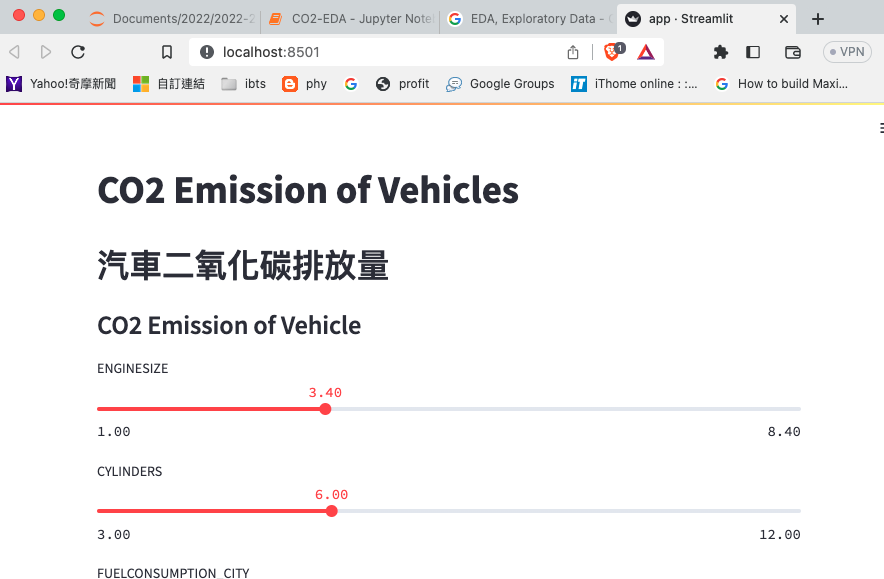

In [31]:
from IPython.display import Image
Image("CO2.png",width=600)